# Train Neural Network to Predict chess ratings

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


Using TensorFlow backend.


Loading data from the file

In [2]:
def get_data(file_name):
    data = pd.read_csv(file_name)
    return data

In [3]:
data = get_data('data_new.csv')


In [4]:
ratings = list(data[' rating'])
age = list(data[' Age'])
name = data[' name']
# print name



In [5]:
import ast
try:
    rating_list = [ast.literal_eval(i) for i in ratings]
    age_list = [ast.literal_eval(i) for i in age]
except ValueError:
    print i

    
print rating_list[0]
print age_list[0]

[2107, 2107, 2107, 2109, 2109, 2109, 2111, 2111, 2111, 2102, 2104, 2086, 2106, 2110, 2110, 2110, 2110, 2110, 2110, 2112, 2123, 2113, 2104, 2094, 2094, 2094, 2094, 2094, 2094, 2098, 2098, 2102, 2110, 2110, 2102, 2105, 2105, 2105, 2105, 2105, 2105, 2105, 2095, 2098, 2098, 2107, 2097, 2104, 2104, 2104, 2092, 2089, 2075]
[589, 590, 591, 593, 594, 595, 597, 598, 599, 600, 601, 602, 603, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 621, 622, 623, 624, 625, 626, 627, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 641, 642, 643, 644, 645, 646, 647]


In [6]:
print data

              id                          name  fed  gender   Birth Date  \
0       24641537      Martin-Sommerfeldt, Luis  GER       M       1964.0   
1       24117250           Czukanov, Stanislav  RUS       M       1939.0   
2        2810751                 Galant, Natan  ISR       M       1981.0   
3       45088772              Muralidhar Rao M  IND       M       2005.0   
4       12582913            Ghaemi, Abdolkarim  IRI       M       1967.0   
5       12582921                 Hamidi, Hotan  IRI       M       1996.0   
6        4194314             Koloschuk, Evgeny  RUS       M       1989.0   
7       45088780                    Nagendra B  IND       M       1997.0   
8        4194306              Parfenov, Nikita  RUS       M       1987.0   
9        2009773             Belanger, Jacques  USA       M       1951.0   
10      24641553                  Neumann, Uwe  GER       M       1957.0   
11       4194322             Ryzhenkov, Sergey  RUS       M       1959.0   
12      3603

Normalize data

In [7]:
rating_list = np.array(rating_list)
age_list = np.array(age_list)
max_v = float(np.max(np.max(rating_list)))
max_a = float(np.max(np.max(age_list)))
print max_v
print max_a

2882.0
21769.0


In [8]:
# fix random seed for reproducibility
np.random.seed(7)

In [9]:
rating_list.shape

(284049,)

In [10]:
train_size = int(rating_list.shape[0] * 0.9)
val_size = int(rating_list.shape[0] * 0.05)
test_size = int(rating_list.shape[0] * 0.05)
print 'train_size= ',train_size,'\n','val_size= ',val_size,'\n','test_size= ',test_size

train_size=  255644 
val_size=  14202 
test_size=  14202


In [11]:
x_train = np.array([rating_list[:train_size],age_list[:train_size]])
x_val = np.array([rating_list[train_size:train_size+val_size],age_list[train_size:train_size+val_size]])
x_test = np.array([rating_list[-test_size:],age_list[-test_size:]])
print x_val.shape

(2, 14202)


In [12]:
print x_train[0][0]
x_train[0][0][len(x_train[0][0])-2]

[2107, 2107, 2107, 2109, 2109, 2109, 2111, 2111, 2111, 2102, 2104, 2086, 2106, 2110, 2110, 2110, 2110, 2110, 2110, 2112, 2123, 2113, 2104, 2094, 2094, 2094, 2094, 2094, 2094, 2098, 2098, 2102, 2110, 2110, 2102, 2105, 2105, 2105, 2105, 2105, 2105, 2105, 2095, 2098, 2098, 2107, 2097, 2104, 2104, 2104, 2092, 2089, 2075]


2089

In [13]:
batch_size = 1

model = Sequential()
layer1 = model.add(LSTM(1,return_sequences=True, batch_input_shape=(batch_size,1,2),stateful= True))
layer2 = model.add(LSTM(1,return_sequences=False, stateful= True))
layer4 = model.add(Dense(1))

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mse',optimizer = adam,metrics=['accuracy'])
#model.fit(x_train, y_train_norm, epochs= 10, batch_size =batch_size, verbose = 2, shuffle=False, validation_data=(x_val,y_val_norm))


In [14]:
print('Train...')
size =2000 #x_train.shape[1]
for epoch in range(25):

    mean_tr_acc = []
    mean_tr_loss = []
    for i in range(size):
        if i%10==0:
            print i,
#         print len(x_train[0][i])-1
        for j in range(len(x_train[0][i])-1):
            x_true = np.array([x_train[0][i][j]/max_v,x_train[1][i][j]/max_a])
            x_true = np.reshape(x_true,(1,1,2))
            y_true = np.array([x_train[0][i][-1]/max_v])
#             print x_true,y_true
            tr_loss, tr_acc = model.train_on_batch(x_true,y_true)
            mean_tr_acc.append(tr_acc)
            mean_tr_loss.append(tr_loss)
        model.reset_states()
        
        #if i % 1000 == 0:
            #print epoch, i, np.mean(mean_tr_loss)
    
    print epoch, np.mean(mean_tr_loss)


    print('accuracy training = {}'.format(np.mean(mean_tr_acc)))
    print('loss training = {}'.format(np.mean(mean_tr_loss)))
    print('___________________________________')
    model.reset_states()



Train...
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 0 0.00411522
accuracy training = 0.0
loss training = 0.00411521969363
________________________________

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 8 0.000411788
accuracy training = 0.0
loss training = 0.000411788321799
___________________________________
0 1

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 16 0.000386468
accuracy training = 0.0
loss training = 0.000386468076613
___________________________________
0 

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 24 0.00038712
accuracy training = 0.0
loss training = 0.000387120089727
___________________________________


In [15]:
y_pred_list = []
y_train = []
for i in range(size):
#     print i,
    temp = []
    temp2 =[]
    for j in range(len(x_train[0][i])-2,len(x_train[0][i])-1):
        x_true = np.array([x_train[0][i][j]/max_v,x_train[1][i][j]/max_a])
        x_true = np.reshape(x_true,(1,1,2))
        y_true = np.array([x_train[0][i][-1]/max_v])
        y_pred = model.predict_on_batch(x_true)

        
        temp.append(y_pred[0][0]*max_v)
        temp2.append(y_true[0]*max_v)
#     print temp
    y_pred_list.append(temp)
    y_train.append(temp2)

# print y_train, y_pred_list

In [16]:
print np.array(y_pred_list).shape

(2000, 1)


In [17]:
print y_pred_list[0], y_train[0]

[2101.1476395130157] [2075.0]


In [18]:
y_predict = np.array(y_pred_list)
y_train = np.array(y_train)
error = 0
length = 0
for i in range(y_train.shape[0]):
    temp = np.zeros(len(y_train[i]))
    temp = abs(np.array(y_train[i])-np.array(y_predict[i]))/np.array(y_train[i])
    error += np.sum(temp)
    length += temp.shape[0] 
    
percentage_error = error/(length)

print (error)
print length 
print percentage_error

327.109826276
2000
0.163554913138


0.163554913138


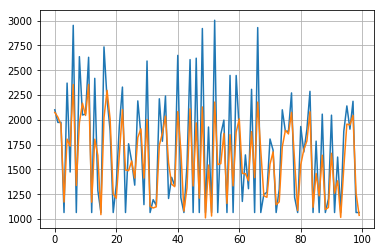

In [19]:
print percentage_error
# print y_predict
m=200
plt.plot(np.array(y_predict[:100]))
plt.plot(np.array(y_train[:100]))
plt.grid()
plt.show()

In [20]:
print("Accuracy:",(1-percentage_error)*100)

('Accuracy:', 83.644508686210429)


In [32]:
print "...........test............"
ytest_pred_list = []
y_test = []
for i in range(100):
    temp = []
    temp2 =[]
    for j in range(len(x_test[0][i])-1):
        x_true = np.array([x_test[0][i][j]/max_v,x_test[1][i][j]/max_a])
        x_true = np.reshape(x_true,(1,1,2))
        y_true = np.array([x_test[0][i][-1]/max_v])
        y_pred = model.predict_on_batch(x_true)

        
    temp.append(y_pred[0][0]*max_v)
    temp2.append(y_true[0]*max_v)
#     print temp
    ytest_pred_list.append(temp)
    y_test.append(temp2)
#     model.reset_states()

print y_test[0], ytest_pred_list[0]

...........test............
[1232.0] [1259.2856001257896]


In [33]:
ytest_predict = np.array(ytest_pred_list)
y_test = np.array(y_test)
error = 0
length = 0
for i in range(y_test.shape[0]):
    temp = np.zeros(len(y_test[i]))
    temp = abs(np.array(y_test[i])-np.array(ytest_predict[i]))/np.array(y_test[i])
    error += np.sum(temp)
    length += temp.shape[0] 
    
test_error = error/(length)

print (error)
print length 
print test_error

2.19416156457
100
0.0219416156457


('Test Accuracy:', 97.805838435426367)


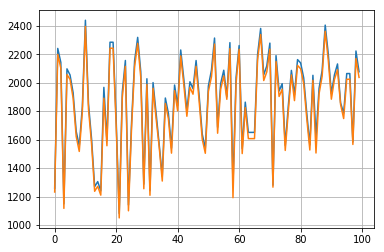

In [34]:
n = 3
print("Test Accuracy:",(1-test_error)*100)
# print y_predict
plt.plot(np.array(ytest_predict))
plt.plot(np.array(y_test))
plt.grid()
plt.show()

In [35]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [36]:
from keras.models import model_from_json

#load model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [37]:
print loaded_model

In [38]:
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [40]:
print "...........test............"
ytest_pred_list = []
y_test = []
for i in range(100):
    temp = []
    temp2 =[]
    for j in range(len(x_test[0][i])-1):
        x_true = np.array([x_test[0][i][j]/max_v,x_test[1][i][j]/max_a])
        x_true = np.reshape(x_true,(1,1,2))
        y_true = np.array([x_test[0][i][-1]/max_v])
        y_pred = loaded_model.predict_on_batch(x_true)
        
    temp.append(y_pred[0][0]*max_v)
    temp2.append(y_true[0]*max_v)
#     print temp
    ytest_pred_list.append(temp)
    y_test.append(temp2)
#     model.reset_states()

print y_test[0], ytest_pred_list[0]

...........test............
[1232.0] [1259.2158572077751]
